In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("GenZ_DatingApp_Data.csv")

In [5]:
df.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [7]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Primary_App       107
Secondary_Apps    114
Challenges        117
dtype: int64


In [8]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
# Check for inconsistencies in categorical values
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Gender: ['Non-binary' 'Female' 'Male']
Location: ['Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Pune' 'Hyderabad']
Education: ['Undergraduate' 'Graduate' 'Postgraduate']
Occupation: ['Freelancer' 'Part-time Job' 'Intern' 'Full-time Job' 'Student']
Primary_App: ['Hinge' nan 'OkCupid' 'Tinder' 'Bumble']
Secondary_Apps: ['Hinge' 'OkCupid' nan 'Tinder' 'Bumble']
Usage_Frequency: ['Monthly' 'Weekly' 'Daily']
Daily_Usage_Time: ['1 hour' '30 minutes' '2 hours' '1.5 hours' '3 hours']
Reason_for_Using: ['Finding a Partner' 'Casual Dating' 'Casual Fun' 'Social Interaction']
Challenges: ['Safety Concerns' 'Time-Wasting' nan 'Lack of Genuine Matches']
Desired_Features: ['Audio Calls' 'Video Calls' 'Detailed Profiles' 'AI Recommendations'
 'Location-Based Matching']
Preferred_Communication: ['Video Calls' 'Text' 'Voice Notes']
Partner_Priorities: ['Values > Personality > Appearance' 'Personality > Interests > Values'
 'Appearance > Interests > Personality'

In [11]:
#convert to categorical columns
categorical_cols = ['User_ID',
    'Gender', 'Location', 'Education', 'Occupation', 'Primary_App', 
    'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time', 'Reason_for_Using', 
    'Satisfaction','Challenges', 'Desired_Features', 'Preferred_Communication', 'Partner_Priorities'
]

df[categorical_cols] = df[categorical_cols].astype('category')

# Check the updated types
print(df.dtypes)

User_ID                    category
Age                           int64
Gender                     category
Location                   category
Education                  category
Occupation                 category
Primary_App                category
Secondary_Apps             category
Usage_Frequency            category
Daily_Usage_Time           category
Reason_for_Using           category
Satisfaction               category
Challenges                 category
Desired_Features           category
Preferred_Communication    category
Partner_Priorities         category
dtype: object


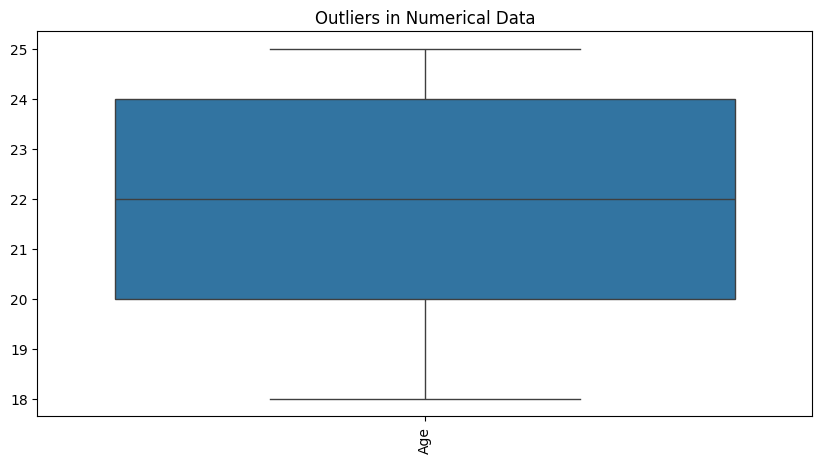

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.title("Outliers in Numerical Data")
plt.show()


In [22]:
df.to_csv("cleaned_data_v1.csv", index=False)